## 한 개 이상의 Feature로 구성된 데이터를 분석할 때

- 식은 많아지지만 여전히 목적은 Cost Function의 최적화

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

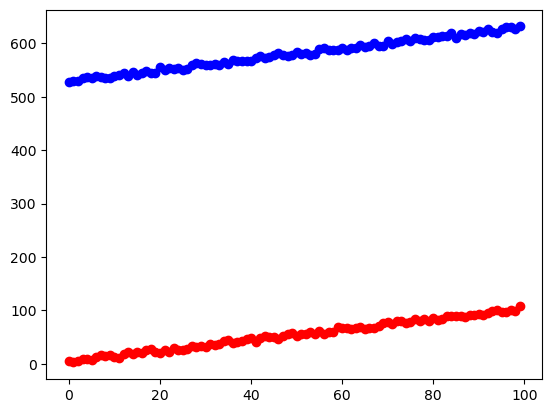

In [11]:
# 임의의 값 생성
# numPoints = 데이터의 개수
# bias = 절편
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)

    for i in range(0, numPoints):
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1

        y[i] = (i + bias) + random.uniform(0, 1) * variance + 500
    return x, y


x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [8]:
x

array([[  2.58896955,   4.8868971 ,   1.        ],
       [  3.31662351,   8.70593986,   1.        ],
       [  7.35746371,   7.86680488,   1.        ],
       [  7.19083492,   8.71633553,   1.        ],
       [  8.63509136,  13.83188336,   1.        ],
       [  5.50486309,   5.85111065,   1.        ],
       [ 15.7483494 ,  12.08472491,   1.        ],
       [ 12.34396484,  16.61370802,   1.        ],
       [ 16.91187698,  15.42549296,   1.        ],
       [  9.05578066,  13.81043786,   1.        ],
       [ 10.1294358 ,  11.73891052,   1.        ],
       [ 15.31994909,  16.39483192,   1.        ],
       [ 13.71562075,  12.95003949,   1.        ],
       [ 22.24143929,  19.04347156,   1.        ],
       [ 17.59147522,  21.96210723,   1.        ],
       [ 24.6152286 ,  16.23852304,   1.        ],
       [ 25.13668218,  18.62095928,   1.        ],
       [ 22.60921394,  25.75099416,   1.        ],
       [ 19.01811162,  22.02788756,   1.        ],
       [ 20.31147071,  20.19168

In [9]:
y

array([525.46932069, 533.2522155 , 528.87806583, 536.81262023,
       533.58856114, 532.38297659, 534.56741591, 541.15141063,
       538.14026514, 541.03246558, 540.98253017, 544.40267636,
       543.87156532, 538.37759065, 542.55951123, 548.76949397,
       544.77966275, 546.17187475, 552.29745006, 553.70677303,
       550.08337813, 550.95952113, 550.80182924, 557.31876658,
       554.03365948, 553.91460116, 557.64935333, 561.32216747,
       557.05349561, 563.53173349, 556.74518102, 564.50394638,
       566.72407634, 565.36383714, 560.93523424, 562.73943623,
       568.22880008, 564.21098989, 567.18972908, 570.88901569,
       572.00060779, 571.26010177, 573.00488844, 577.15905601,
       577.53980487, 573.0015316 , 578.13782836, 572.18675288,
       579.68635569, 577.76487437, 579.42008905, 583.9622624 ,
       586.27302261, 587.43245073, 580.48337922, 580.17033002,
       584.66588138, 585.81490612, 587.72538565, 589.36449351,
       585.67396491, 592.91877082, 592.83718122, 592.67

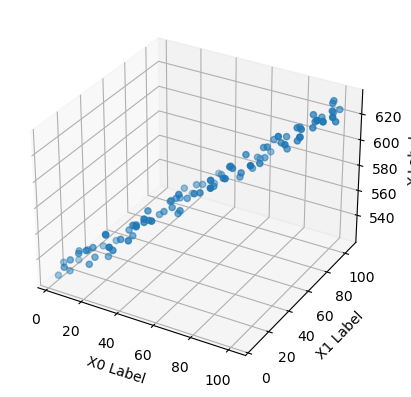

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel('X0 Label')
ax.set_ylabel('X1 Label')
ax.set_zlabel('Y Label')

plt.show()

In [12]:
def compute_cost(x, y, theta):
    
    # Number of training samples
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0/ (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

In [22]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):   
        # predictions = y_hat     
        predictions = x.dot(theta)
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum()
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [30]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(x, y, theta_initial, 1000000, 0.0001)
print('theta', theta)

theta [4.10787220e-01 5.94071752e-01 5.25165022e+02]


In [29]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:, :2], y)

print('Coefficients: ', regr.coef_)
print('intercept : ', regr.intercept_)

Coefficients:  [0.4107872  0.59407177]
intercept :  525.1650230210878


In [33]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10,:2].reshape(1,2)))

538.040469710471
[538.04047013]


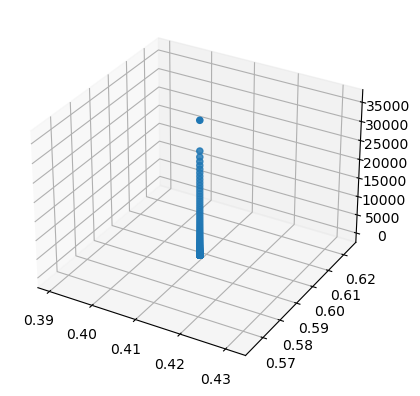

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0],theta_history[:,1], cost_history, zdir="z")


plt.show()

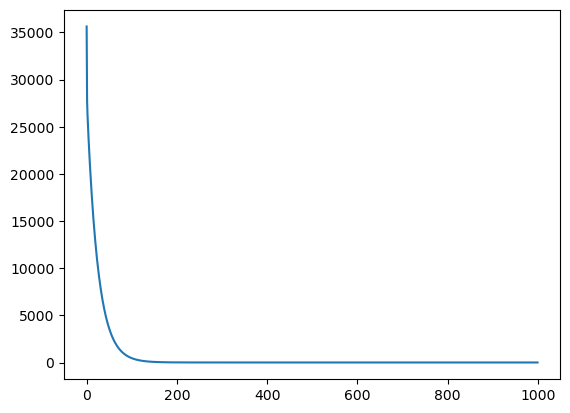

In [35]:
plt.plot(cost_history)
plt.show()